# RRT-based Motion Planning Analysis
### import python modules

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import pandas as pd
import sys
from scipy.stats import mannwhitneyu,ttest_ind



In /home/zubuntu/.local/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The text.latex.preview rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In /home/zubuntu/.local/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The mathtext.fallback_to_cm rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In /home/zubuntu/.local/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: Support for setting the 'mathtext.fallback_to_cm' rcParam is deprecated since 3.3 and will be removed two minor releases later; use 'mathtext.fallback : 'cm' instead.
In /home/zubuntu/.local/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The validate_bool_maybe_none function was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In /home/zubuntu/.local/lib/python3.6/site-packages/matplotlib/mpl-d

## <font color='red'>Section 1: Data Preprocessing </font> 

#### define column name

In [2]:
name = ['algo','estep','X','Y','Z','r','s1','s2','s3','s4','time','distance']

#### get data

In [3]:
df1 = pd.read_csv('rrt.csv').to_numpy()
data = pd.DataFrame(df1[:,:-1],columns=name)
data

,algo,estep,X,Y,Z,r,s1,s2,s3,s4,time,distance
0,0.0,0.2,-0.4,0.3,0.05,0.01,1.0,1.0,1.0,1.0,7.64770,22.2653
1,0.0,0.2,-0.4,0.3,0.05,0.02,1.0,1.0,1.0,1.0,6.38284,21.1832
2,0.0,0.2,-0.4,0.3,0.05,0.03,1.0,1.0,1.0,1.0,5.96251,17.0806
3,0.0,0.2,-0.4,0.3,0.05,0.04,1.0,1.0,1.0,1.0,7.11386,25.8714
4,0.0,0.2,-0.4,0.3,0.05,0.05,1.0,1.0,1.0,1.0,5.84448,18.1056
...,...,...,...,...,...,...,...,...,...,...,...,...
3450,2.0,0.8,0.4,0.6,0.35,1.01,1.0,1.0,1.0,1.0,9.02987,34.0831
3451,2.0,0.8,0.4,0.6,0.35,1.02,1.0,1.0,1.0,1.0,6.96926,32.2107
3452,2.0,0.8,0.4,0.6,0.35,1.03,1.0,1.0,0.0,1.0,5.07587,27.5048
3453,2.0,0.8,0.4,0.6,0.35,1.04,1.0,0.0,0.0,1.0,5.03116,19.8157


### combined data with same id

In [4]:
def preprocess(data):
    ret = []
    cols = ['algo','estep']
    features = data[cols].drop_duplicates().to_numpy()
    for fea in features:
        print("------------------------------")
        print("RRT parameters:",fea)
        cond = True
        for i in range(2):
            cond = cond & (data[cols[i]] == fea[i])
        data_i = data.loc[cond]
        data_i_true = data_i.loc[(data['s1'] == 1) & (data['s2'] == 1)  & (data['s3'] == 1) & (data['s4'] == 1)]
        succ_rate = data_i_true.shape[0]/data_i.shape[0]
        print("- success rate:",succ_rate)
        times = data_i_true['time'].to_numpy()
        distances = data_i_true['distance'].to_numpy()
        print("- average time:",np.average(times))
        print("- average moving distance:",np.average(distances))
        ret.append([succ_rate,times,distances])
    return ret

In [5]:
predata = preprocess(data)

------------------------------
RRT parameters: [0.  0.2]
- success rate: 0.6550522648083623
- average time: 7.854630372340426
- average moving distance: 25.198723404255322
------------------------------
RRT parameters: [0.  0.4]
- success rate: 0.65625
- average time: 7.143561164021165
- average moving distance: 24.496379894179896
------------------------------
RRT parameters: [0.  0.6]
- success rate: 0.65625
- average time: 6.73956328042328
- average moving distance: 24.43257195767196
------------------------------
RRT parameters: [0.  0.8]
- success rate: 0.65625
- average time: 6.509638994708995
- average moving distance: 24.63261851851852
------------------------------
RRT parameters: [1.  0.2]
- success rate: 0.65625
- average time: 7.882605343915345
- average moving distance: 25.295632804232806
------------------------------
RRT parameters: [1.  0.4]
- success rate: 0.65625
- average time: 6.729137354497354
- average moving distance: 24.257840740740743
--------------------------

## <font color='red'>Section 2: Box Plot </font> 

#### Computational Time

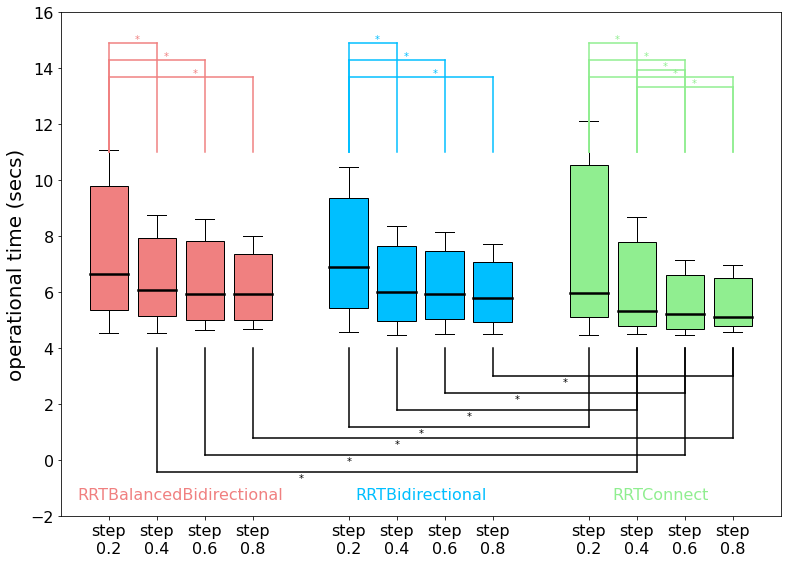

In [47]:
fig = plt.figure(figsize =(10, 7))
 
# Creating axes instance
ax = fig.add_axes([0, 0, 1, 1])

colors = ['lightcoral', 'deepskyblue', 'lightgreen']
labels = ['0.2','0.4','0.6','0.8']
algos = ['RRTBalancedBidirectional','RRTBidirectional','RRTConnect','RRTBasic']
medianprops = dict(linestyle='-', linewidth=2.5, color='black')
# Creating plot
data_idx = 1
dx_minor = 0.5
dx_major = 2.5

for i in range(len(predata)):
    xi = 1.0+dx_minor*(i%4)+dx_major*(i//4)
    data_i = np.array(predata[i][data_idx])
    bp = ax.boxplot([data_i],showfliers=False,medianprops=medianprops,positions=[1.0+dx_minor*(i%4)+dx_major*(i//4)],
                    patch_artist=True,whis=0.3,labels=['step\n'+labels[i%4]], widths=0.8*dx_minor)
    
    for patch in bp['boxes']:
        patch.set_facecolor(colors[i//4])
    for j in range(i+1,4*(1+i//4)):
        try:
            xj = 1.0+dx_minor*(j%4)+dx_major*(j//4)
            data_j = np.array(predata[j][data_idx])
            p_value = mannwhitneyu(data_i,data_j)[1]
            if (p_value < 0.05):
                max_y1 = 11
                max_y2 = 15.5-0.6*(j%4)-0.35*(i%4)
                ax.plot([xi,xi],[max_y1,max_y2],c=colors[i//4])
                ax.plot([xj,xj],[max_y1,max_y2],c=colors[i//4])
                ax.plot([xi,xj],[max_y2,max_y2],c=colors[i//4])
                ax.text((0.4*xi+0.6*xj),max_y2-0.05,'*',bbox={'facecolor':'white','alpha':0,'edgecolor':'none','pad':1},
                       ha='center', va='bottom',c=colors[i//4])
        except:
            pass
        
    for j in range(i,len(predata),4):
        if (j == i):
            continue
        xj = 1.0+dx_minor*(j%4)+dx_major*(j//4)
        data_j = np.array(predata[j][data_idx])
        p_value = mannwhitneyu(data_i,data_j)[1]
        if (p_value < 0.05):
            max_y1 = 4
            max_y2 = -1+0.6*(j%4)+2.2*(i//4)
            ax.plot([xi,xi],[max_y1,max_y2],c='k')
            ax.plot([xj,xj],[max_y1,max_y2],c='k')
            ax.plot([xi,xj],[max_y2,max_y2],c='k')
            ax.text((0.7*xi+0.3*xj),max_y2-0.4,'*',bbox={'facecolor':'white','alpha':0,'edgecolor':'none','pad':1},
                   ha='center', va='bottom',c='k')
    ax.set_ylim([-2,16])
    ax.tick_params(axis='both', which='major', labelsize=16)
for i in range(0,len(predata),4):
    ax.text(1.0+dx_minor*1.5+dx_major*(i//4),-1.5,algos[i//4],bbox={'facecolor':'white','alpha':0,'edgecolor':'none','pad':1},
                   ha='center', va='bottom',c=colors[i//4],fontsize=16)
# show plot
plt.ylabel("operational time (secs)",fontsize=20)
plt.show()

#### Moving Distance

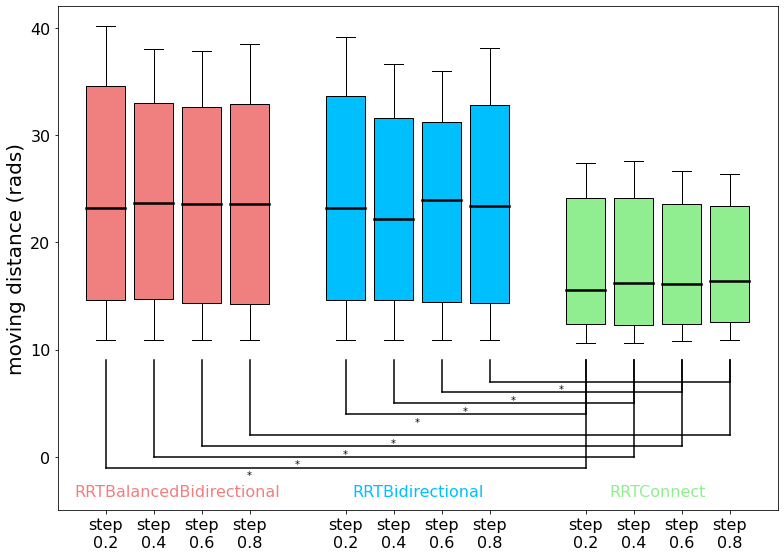

In [62]:
fig = plt.figure(figsize =(10, 7))
 
# Creating axes instance
ax = fig.add_axes([0, 0, 1, 1])

colors = ['lightcoral', 'deepskyblue', 'lightgreen']
labels = ['0.2','0.4','0.6','0.8']
algos = ['RRTBalancedBidirectional','RRTBidirectional','RRTConnect','RRTBasic']
medianprops = dict(linestyle='-', linewidth=2.5, color='black')
# Creating plot
data_idx = 2
dx_minor = 0.5
dx_major = 2.5

for i in range(len(predata)):
    xi = 1.0+dx_minor*(i%4)+dx_major*(i//4)
    data_i = np.array(predata[i][data_idx])
    bp = ax.boxplot([data_i],showfliers=False,medianprops=medianprops,positions=[1.0+dx_minor*(i%4)+dx_major*(i//4)],
                    patch_artist=True,whis=0.3,labels=['step\n'+labels[i%4]], widths=0.8*dx_minor)
    
    for patch in bp['boxes']:
        patch.set_facecolor(colors[i//4])
    for j in range(i+1,4*(1+i//4)):
        try:
            xj = 1.0+dx_minor*(j%4)+dx_major*(j//4)
            data_j = np.array(predata[j][data_idx])
            p_value = mannwhitneyu(data_i,data_j)[1]
            if (p_value < 0.05):
                max_y1 = 11
                max_y2 = 15.5-0.6*(j%4)-0.35*(i%4)
                ax.plot([xi,xi],[max_y1,max_y2],c=colors[i//4])
                ax.plot([xj,xj],[max_y1,max_y2],c=colors[i//4])
                ax.plot([xi,xj],[max_y2,max_y2],c=colors[i//4])
                ax.text((0.4*xi+0.6*xj),max_y2-0.05,'*',bbox={'facecolor':'white','alpha':0,'edgecolor':'none','pad':1},
                       ha='center', va='bottom',c=colors[i//4])
        except:
            pass
        
    for j in range(i,len(predata),4):
        if (j == i):
            continue
        xj = 1.0+dx_minor*(j%4)+dx_major*(j//4)
        data_j = np.array(predata[j][data_idx])
        p_value = mannwhitneyu(data_i,data_j)[1]
        if (p_value < 0.05):
            max_y1 = 9
            max_y2 = -1+1.0*(j%4)+5*(i//4)
            ax.plot([xi,xi],[max_y1,max_y2],c='k')
            ax.plot([xj,xj],[max_y1,max_y2],c='k')
            ax.plot([xi,xj],[max_y2,max_y2],c='k')
            ax.text((0.7*xi+0.3*xj),max_y2-1.2,'*',bbox={'facecolor':'white','alpha':0,'edgecolor':'none','pad':1},
                   ha='center', va='bottom',c='k')
    ax.set_ylim([-5,42])
    ax.tick_params(axis='both', which='major', labelsize=16)
for i in range(0,len(predata),4):
    ax.text(1.0+dx_minor*1.5+dx_major*(i//4),-4,algos[i//4],bbox={'facecolor':'white','alpha':0,'edgecolor':'none','pad':1},
                   ha='center', va='bottom',c=colors[i//4],fontsize=16)
# show plot
plt.ylabel("moving distance (rads)",fontsize=20)
plt.show()